In [1]:
import numpy as np
import pandas as pd
import sqlite3
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base = '../input/lahman2014/'

# **Part 1: Wrangling**

## *Problem 1*

In [3]:
sqlite_file = glob.glob( base + 'lahman2014.sqlite' )[0]
conn = sqlite3.connect(sqlite_file)

In [4]:
query = """
    SELECT t.yearID, t.teamID, t.franchID, t.W, t.G, 
            ( t.W * 1.0 / t.G * 1.0 ) * 100 as winning_percentage,
            sum( s.salary ) as total_payroll
    FROM Salaries as s 
    INNER JOIN Teams as t 
    ON s.yearID = t.yearID AND s.teamID = t.teamID 
    GROUP BY s.yearID, s.teamID
"""
df = pd.read_sql( query, conn) 
df

,yearID,teamID,franchID,W,G,winning_percentage,total_payroll
0,1985,ATL,ATL,66,162,40.740741,14807000.0
1,1985,BAL,BAL,83,161,51.552795,11560712.0
2,1985,BOS,BOS,81,163,49.693252,10897560.0
3,1985,CAL,ANA,90,162,55.555556,14427894.0
4,1985,CHA,CHW,85,163,52.147239,9846178.0
...,...,...,...,...,...,...,...
853,2014,SLN,STL,90,162,55.555556,120693000.0
854,2014,TBA,TBD,77,162,47.530864,72689100.0
855,2014,TEX,TEX,67,162,41.358025,112255059.0
856,2014,TOR,TOR,83,162,51.234568,109920100.0


In [5]:
df.info(), df.describe(), 'Null Values', df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 7 columns):
yearID                858 non-null int64
teamID                858 non-null object
franchID              858 non-null object
W                     858 non-null int64
G                     858 non-null int64
winning_percentage    858 non-null float64
total_payroll         858 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 47.0+ KB


(None,
             yearID           W           G  winning_percentage  total_payroll
 count   858.000000  858.000000  858.000000          858.000000   8.580000e+02
 mean   1999.962704   79.874126  159.794872           49.984052   5.554375e+07
 std       8.572486   11.932443    8.957692            6.897717   3.982276e+07
 min    1985.000000   43.000000  112.000000           26.543210   8.800000e+05
 25%    1993.000000   71.250000  162.000000           45.061728   2.381471e+07
 50%    2000.000000   80.000000  162.000000           50.000000   4.702056e+07
 75%    2007.000000   89.000000  162.000000           54.938272   7.901627e+07
 max    2014.000000  116.000000  164.000000           71.604938   2.319789e+08,
 'Null Values',
 yearID                0
 teamID                0
 franchID              0
 W                     0
 G                     0
 winning_percentage    0
 total_payroll         0
 dtype: int64)

## Comments:
* There is no null values is this columns  [ yearID, teamID, franchID, W, G, winningPercentage, totalPayroll ]

# **Part 2: Exploratory Data Analysis**

# *Payroll distribution *

In [6]:
df = df[ df['yearID'] >= 1990 ]
df = df[ df['yearID'] <= 2014 ]

In [7]:
df

,yearID,teamID,franchID,W,G,winning_percentage,total_payroll
130,1990,ATL,ATL,65,162,40.123457,14555501.0
131,1990,BAL,BAL,76,161,47.204969,9680084.0
132,1990,BOS,BOS,88,162,54.320988,20558333.0
133,1990,CAL,ANA,80,162,49.382716,21720000.0
134,1990,CHA,CHW,94,162,58.024691,9491500.0
...,...,...,...,...,...,...,...
853,2014,SLN,STL,90,162,55.555556,120693000.0
854,2014,TBA,TBD,77,162,47.530864,72689100.0
855,2014,TEX,TEX,67,162,41.358025,112255059.0
856,2014,TOR,TOR,83,162,51.234568,109920100.0


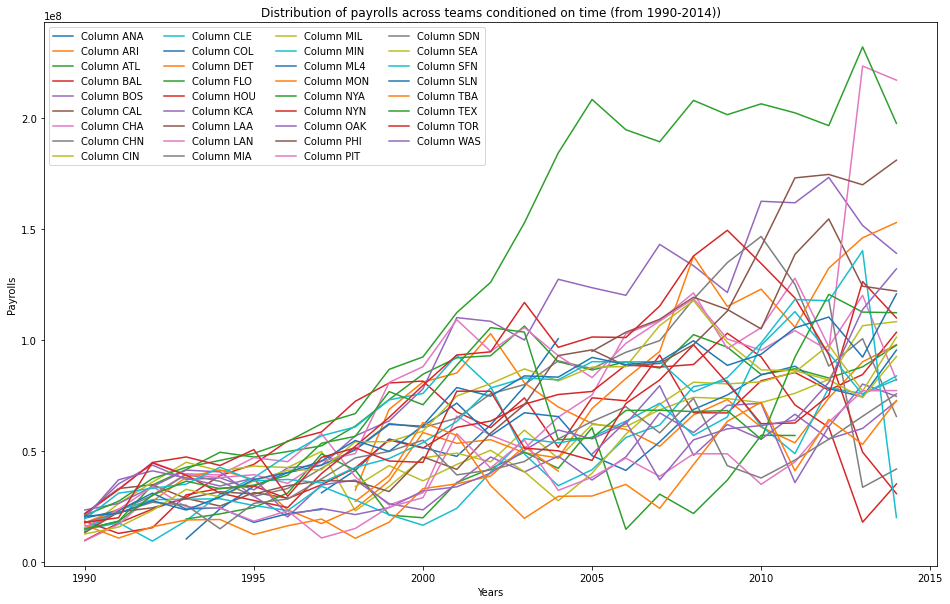

In [8]:
df1 = df.pivot( 
    index = 'yearID',
    columns = 'teamID',
    values = 'total_payroll'
)

plt.figure( figsize=( 16, 10 ) )
for col in df1.columns:
    plt.plot( df1[col], label=f'Column {col}' )
    plt.legend(  loc='best', ncol=4 )
plt.xlabel( "Years" )
plt.ylabel( "Payrolls" )
plt.title( "Distribution of payrolls across teams conditioned on time (from 1990-2014))" );

In [9]:
print( f"Percentage of increasing between min payrolls in 2014 and 1990 --> {( df[ df['yearID'] == 2014 ][ 'total_payroll' ].min()/df[ df['yearID'] == 1990 ][ 'total_payroll' ].min() )*100:.0f}% " )
print( f"Percentage of increasing between max payrolls in 2014 and 1990 --> {( df[ df['yearID'] == 2014 ][ 'total_payroll' ].max()/df[ df['yearID'] == 1990 ][ 'total_payroll' ].max() )*100:.0f}% " )

Percentage of increasing between min payrolls in 2014 and 1990 --> 211% 
Percentage of increasing between max payrolls in 2014 and 1990 --> 929% 


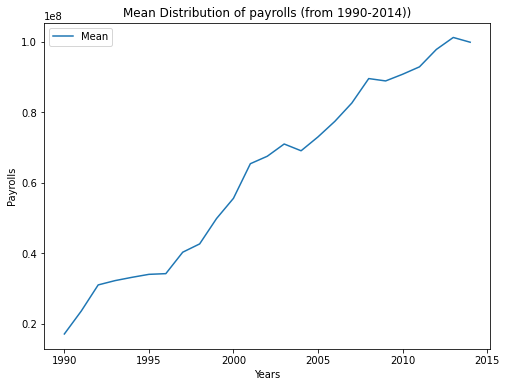

In [10]:
plt.figure( figsize=( 8, 6 ) )
plt.plot( df1.mean( axis=1 ), label=f'Mean' )
plt.legend( loc='best' )
plt.xlabel( "Years" )
plt.ylabel( "Payrolls" )
plt.title( "Mean Distribution of payrolls (from 1990-2014))" );

## Comments:
* In small intervals payroll distribution goes ups & downs.
* Over time payroll distribution is increasing.
* Gaps between teams is also increasing over time.
* Between 1994 and 2014:
    1. minimum payment increased by 210%
    2. maximum payment increased by 929%
* The range between min&max payments increasing overtime.

# * Correlation between payroll and winning percentage  *

In [11]:
"""
def periods( year ):
    if year >= 1990 and year <= 1994:
        return 1
    elif year >= 1995 and year <= 1999:
        return 2
    elif year >= 2000 and year <= 2004:
        return 3
    elif year >= 2005 and year <= 2009:
        return 4
    elif year >= 2010 and year <= 2015:
        return 5
    else:
        raise ValueError;
    
df['years_label'] = df['yearID'].apply( periods )
""";

df['periods'] = pd.cut( df['yearID'], [1990, 1995, 2000, 2005, 2010, 2015], right=False )

df

,yearID,teamID,franchID,W,G,winning_percentage,total_payroll,periods
130,1990,ATL,ATL,65,162,40.123457,14555501.0,"[1990, 1995)"
131,1990,BAL,BAL,76,161,47.204969,9680084.0,"[1990, 1995)"
132,1990,BOS,BOS,88,162,54.320988,20558333.0,"[1990, 1995)"
133,1990,CAL,ANA,80,162,49.382716,21720000.0,"[1990, 1995)"
134,1990,CHA,CHW,94,162,58.024691,9491500.0,"[1990, 1995)"
...,...,...,...,...,...,...,...,...
853,2014,SLN,STL,90,162,55.555556,120693000.0,"[2010, 2015)"
854,2014,TBA,TBD,77,162,47.530864,72689100.0,"[2010, 2015)"
855,2014,TEX,TEX,67,162,41.358025,112255059.0,"[2010, 2015)"
856,2014,TOR,TOR,83,162,51.234568,109920100.0,"[2010, 2015)"


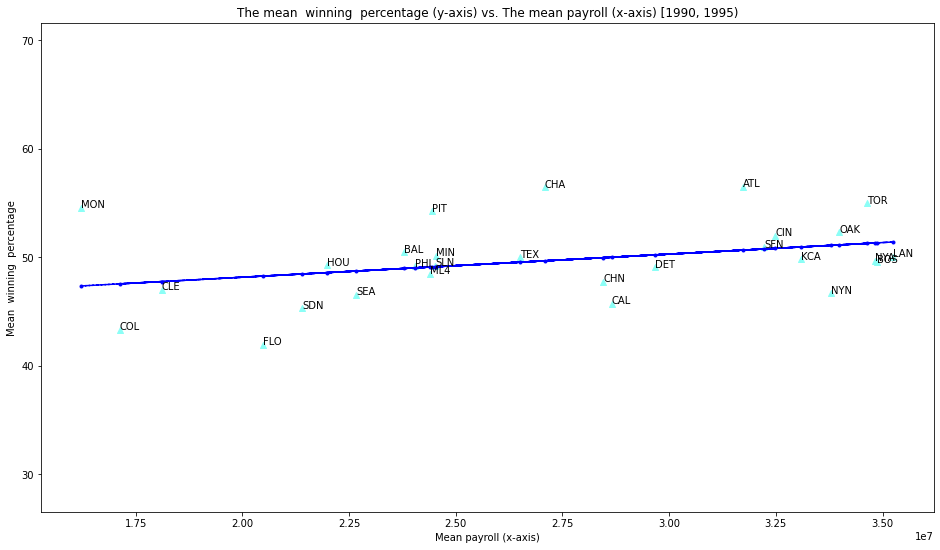

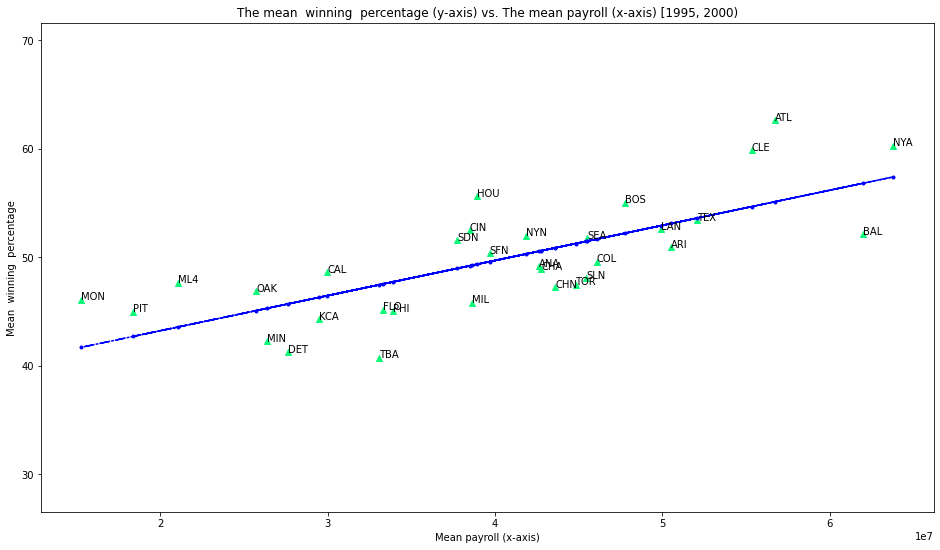

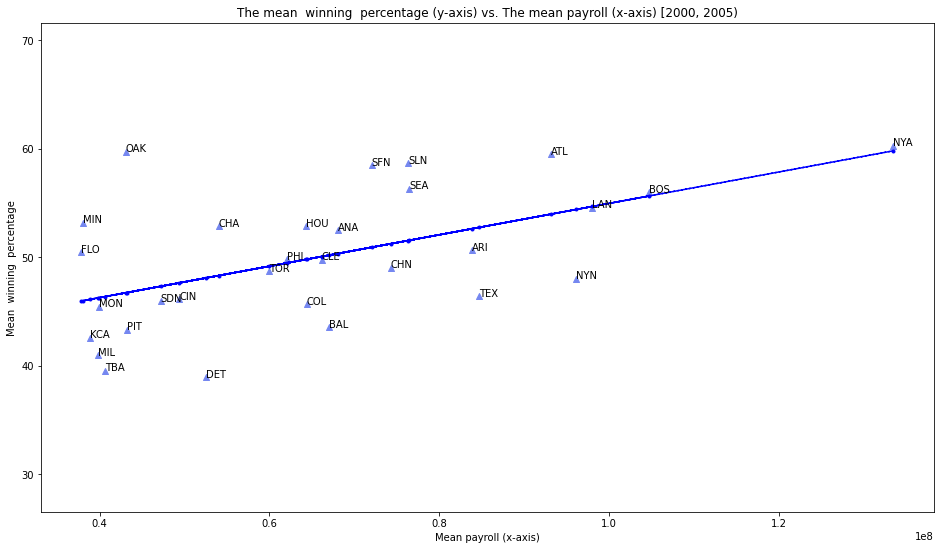

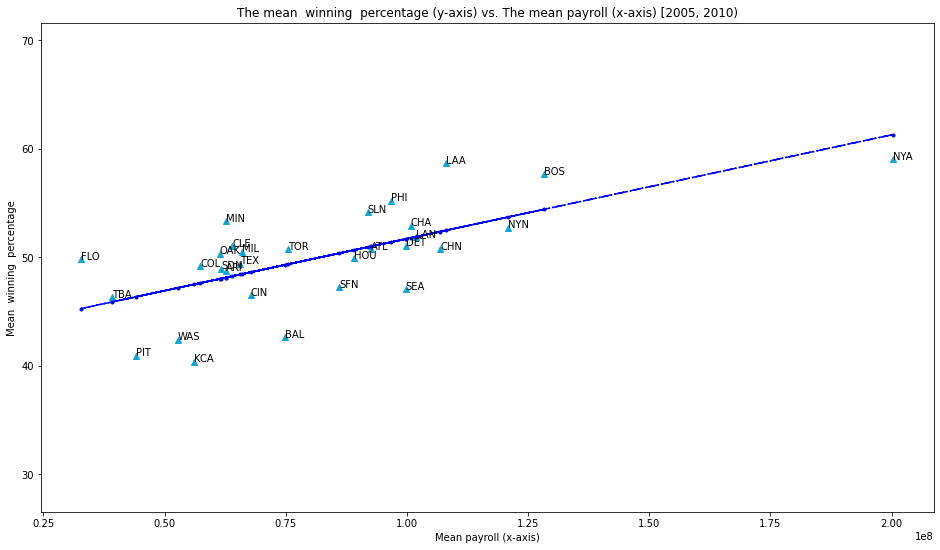

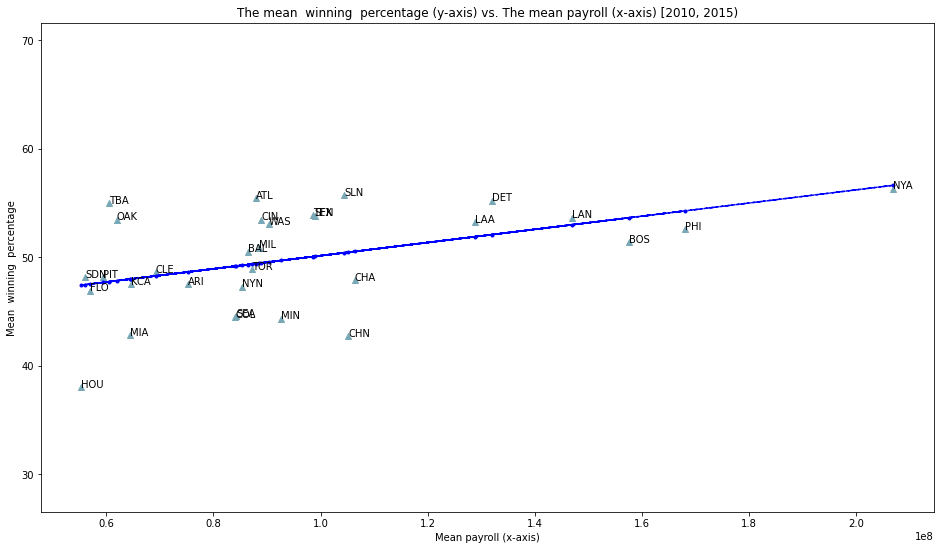

In [12]:
for idx, period in df.groupby( 'periods' ):
    total_payroll_mean, winning_percentage_mean, teams_names  = [], [], []
    for i, team in period.groupby( 'teamID' ):
        total_payroll_mean.append( team['total_payroll'].mean() )
        winning_percentage_mean.append( team['winning_percentage'].mean() )
        teams_names.append( i )
        
    fig, ax = plt.subplots( figsize=(16,9) )
    ax.scatter(
        total_payroll_mean,
        winning_percentage_mean,
        marker = '^',
        color = np.random.rand(3,),
    )
    # use polyfit to plot line of correlation
    slope, intercept = np.polyfit( total_payroll_mean, winning_percentage_mean, 1 )
    plt.plot(
        total_payroll_mean, 
        np.multiply( slope, total_payroll_mean ) + intercept,
        '.-.',
        color='b'
    )
    plt.title( f"The mean  winning  percentage (y-axis) vs. The mean payroll (x-axis) {idx}" )
    plt.xlabel( "Mean payroll (x-axis)" )
    plt.ylabel( "Mean  winning  percentage" )
    plt.ylim( df['winning_percentage'].min(), df['winning_percentage'].max() )
    #plt.xlim( df['total_payroll'].min(), df['total_payroll'].max() )
    for i, team_name in enumerate( teams_names ):
        ax.annotate( team_name, ( total_payroll_mean[i], winning_percentage_mean[i] ) )

## Comments:
* Through the five time periods teams pay more "increasing in payrolls" and spread wider.
* NYA stand out as being particularly good at paying for wins across these periods
* "Oakland" OAK have less payroll and achieve high winning percentage. " walk through or high the mean "

# **Part 3: Data transformations**

# * Standardizing across years  *

In [13]:
for idx, year in df.groupby('yearID'):
    for idy, team in year.groupby("teamID"):
        df.loc[
            ( df['yearID'] == idx ) & ( df['teamID'] == idy ),
            'standardized_payroll'
        ] = ( team['total_payroll'] -  year['total_payroll'].mean() ) / year['total_payroll'].std()

df

,yearID,teamID,franchID,W,G,winning_percentage,total_payroll,periods,standardized_payroll
130,1990,ATL,ATL,65,162,40.123457,14555501.0,"[1990, 1995)",-0.667275
131,1990,BAL,BAL,76,161,47.204969,9680084.0,"[1990, 1995)",-1.959861
132,1990,BOS,BOS,88,162,54.320988,20558333.0,"[1990, 1995)",0.924213
133,1990,CAL,ANA,80,162,49.382716,21720000.0,"[1990, 1995)",1.232198
134,1990,CHA,CHW,94,162,58.024691,9491500.0,"[1990, 1995)",-2.009859
...,...,...,...,...,...,...,...,...,...
853,2014,SLN,STL,90,162,55.555556,120693000.0,"[2010, 2015)",0.457126
854,2014,TBA,TBD,77,162,47.530864,72689100.0,"[2010, 2015)",-0.593171
855,2014,TEX,TEX,67,162,41.358025,112255059.0,"[2010, 2015)",0.272509
856,2014,TOR,TOR,83,162,51.234568,109920100.0,"[2010, 2015)",0.221422


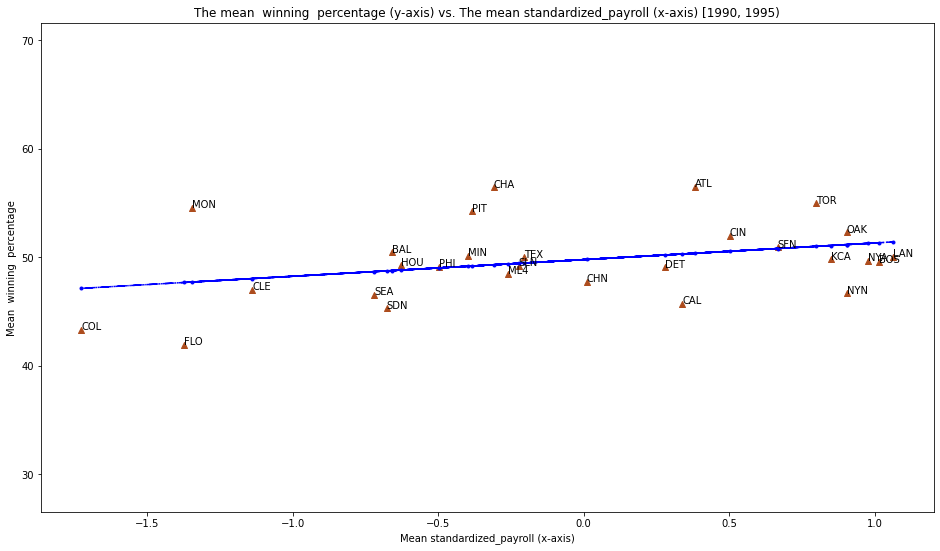

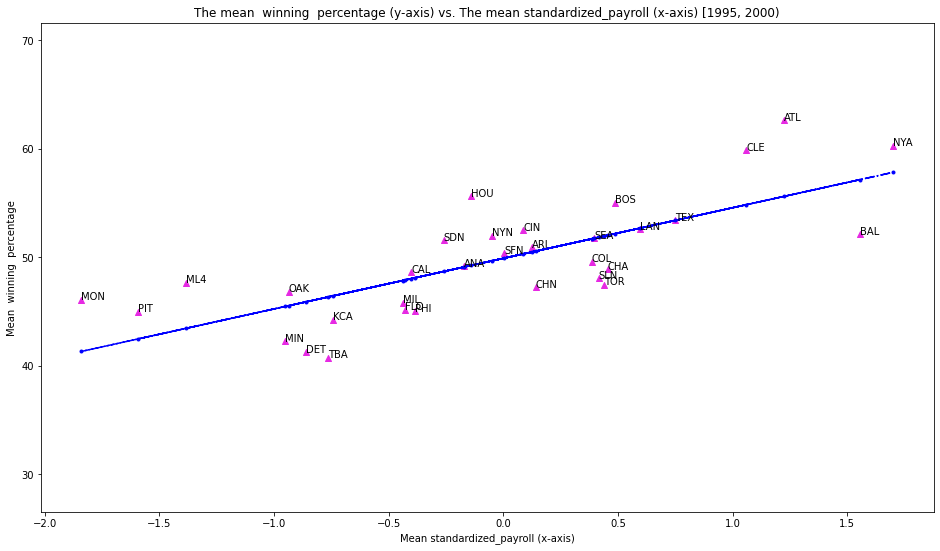

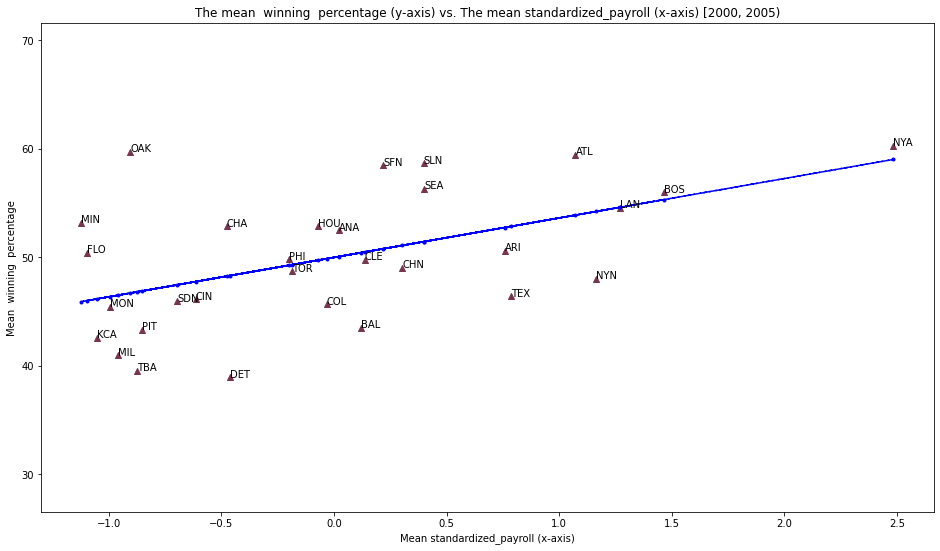

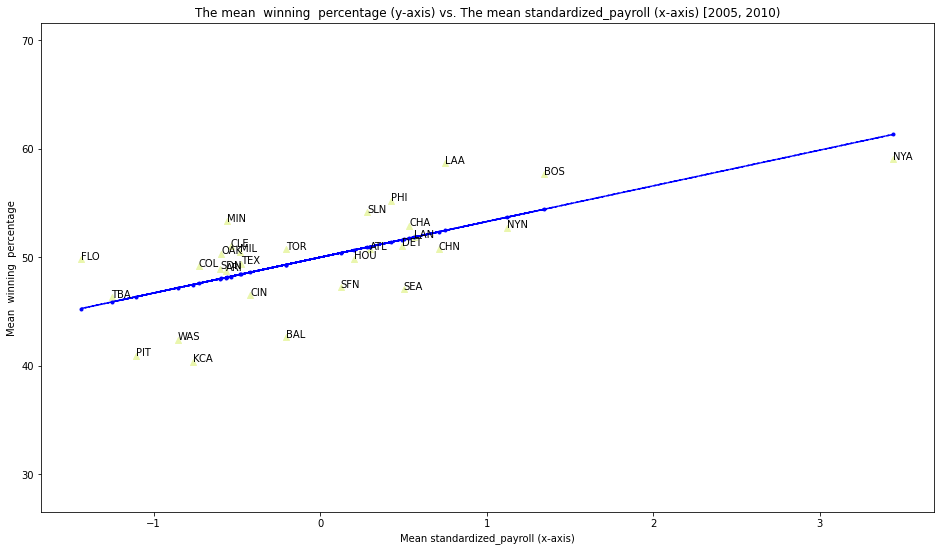

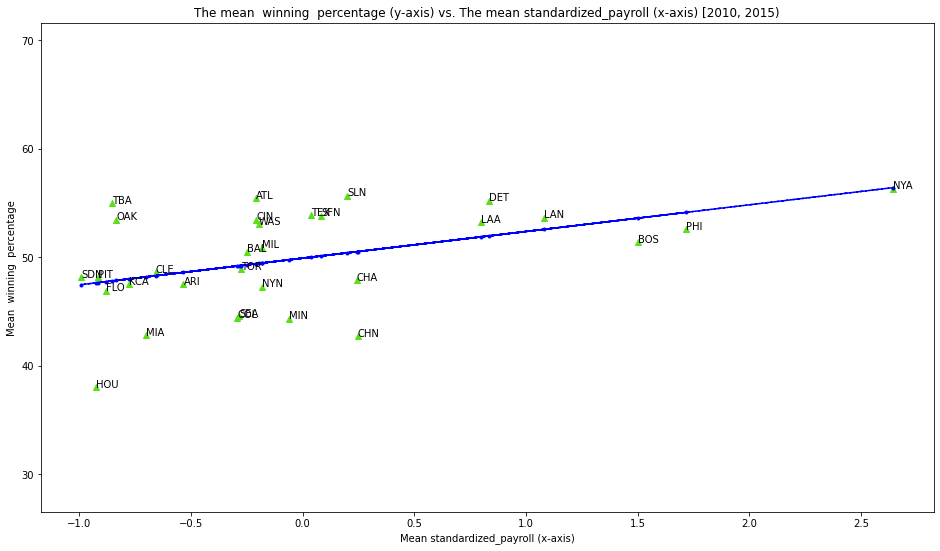

In [14]:
for idx, period in df.groupby( 'periods' ):
    total_payroll_mean, winning_percentage_mean, teams_names  = [], [], []
    for i, team in period.groupby( 'teamID' ):
        total_payroll_mean.append( team['standardized_payroll'].mean() )
        winning_percentage_mean.append( team['winning_percentage'].mean() )
        teams_names.append( i )
    
    fig, ax = plt.subplots( figsize=(16,9) )
    ax.scatter(
        total_payroll_mean,
        winning_percentage_mean,
        marker = '^',
        color = np.random.rand(3,),
    )
    slope, intercept = np.polyfit( total_payroll_mean, winning_percentage_mean, 1 )
    plt.plot(
        total_payroll_mean, 
        np.multiply( slope, total_payroll_mean ) + intercept,
        '.-.',
        color='b'
    )
    plt.title( f"The mean  winning  percentage (y-axis) vs. The mean standardized_payroll (x-axis) {idx}" )
    plt.xlabel( "Mean standardized_payroll (x-axis)" )
    plt.ylabel( "Mean  winning  percentage" )
    plt.ylim( df['winning_percentage'].min(), df['winning_percentage'].max() )
    #plt.xlim( df['standardized_payroll'].min(), df['standardized_payroll'].max() )
    for i, team_name in enumerate( teams_names ):
        ax.annotate( team_name, ( total_payroll_mean[i], winning_percentage_mean[i] ) )

## Comments:
* Before standardization our data is more compressed and have a wide range.
* After standardization "rescale data" it reflect better distribution of the payroll from mean to a std. "data less compressed"

# * Expected wins *

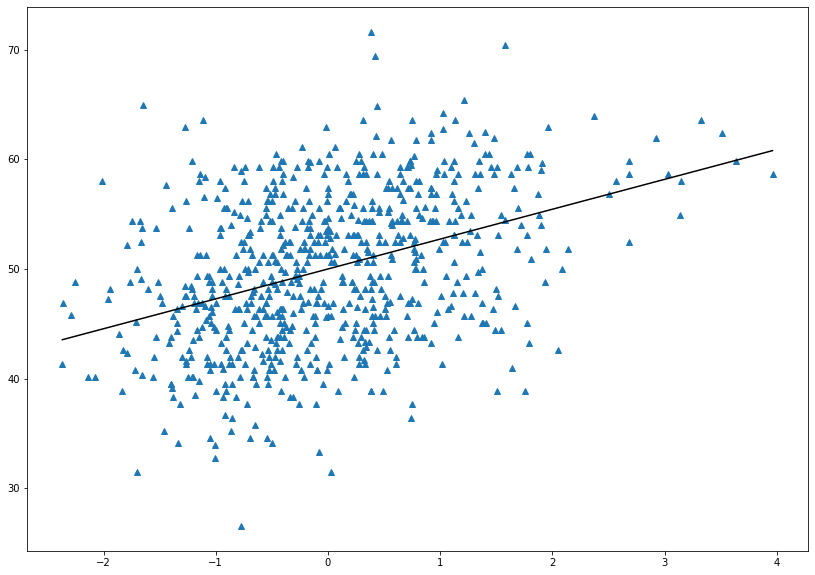

In [15]:
df = df[ np.isfinite( df['winning_percentage'] ) ]
df = df[ np.isfinite( df['standardized_payroll'] ) ]

slope, intercept = np.polyfit( df['standardized_payroll'], df['winning_percentage'], 1 )
points = np.linspace( df['standardized_payroll'].min(), df['standardized_payroll'].max(), 100 )

plt.figure( figsize=(14, 10) );plt.plot( df['standardized_payroll'], df['winning_percentage'], '^' );
plt.plot(
    points, 
    np.multiply( slope, points ) + intercept,
    '-',
    color='black'
);
plt.xlabel( "Standard Payroll" );
plt.ylabel( "Winning Percentage" );

In [16]:
print( f"slope: {slope:.3f}" )
print( f"intercept: {intercept:.3f}" )

slope: 2.725
intercept: 49.989


## Comments:
* Numpy polyfit function help finding slope = 2.725 and intercept = 49.989 equation used in last plot.
* To express our result respect to the expected winning percentage we can use ROUND. 

# * Spending efficiency *

In [17]:
for idx, year in df.groupby('yearID'):    
    for idy, team in year.groupby('teamID'):
        df.loc[
            ( df['yearID'] == idx ) & ( df['teamID'] == idy ),
            'efficiency'
        ] = team['winning_percentage'] - ( slope * team['standardized_payroll'] + intercept ) 
        
df

,yearID,teamID,franchID,W,G,winning_percentage,total_payroll,periods,standardized_payroll,efficiency
130,1990,ATL,ATL,65,162,40.123457,14555501.0,"[1990, 1995)",-0.667275,-8.046701
131,1990,BAL,BAL,76,161,47.204969,9680084.0,"[1990, 1995)",-1.959861,2.557239
132,1990,BOS,BOS,88,162,54.320988,20558333.0,"[1990, 1995)",0.924213,1.813857
133,1990,CAL,ANA,80,162,49.382716,21720000.0,"[1990, 1995)",1.232198,-3.963704
134,1990,CHA,CHW,94,162,58.024691,9491500.0,"[1990, 1995)",-2.009859,13.513211
...,...,...,...,...,...,...,...,...,...,...
853,2014,SLN,STL,90,162,55.555556,120693000.0,"[2010, 2015)",0.457126,4.321286
854,2014,TBA,TBD,77,162,47.530864,72689100.0,"[2010, 2015)",-0.593171,-0.841236
855,2014,TEX,TEX,67,162,41.358025,112255059.0,"[2010, 2015)",0.272509,-9.373144
856,2014,TOR,TOR,83,162,51.234568,109920100.0,"[2010, 2015)",0.221422,0.642618


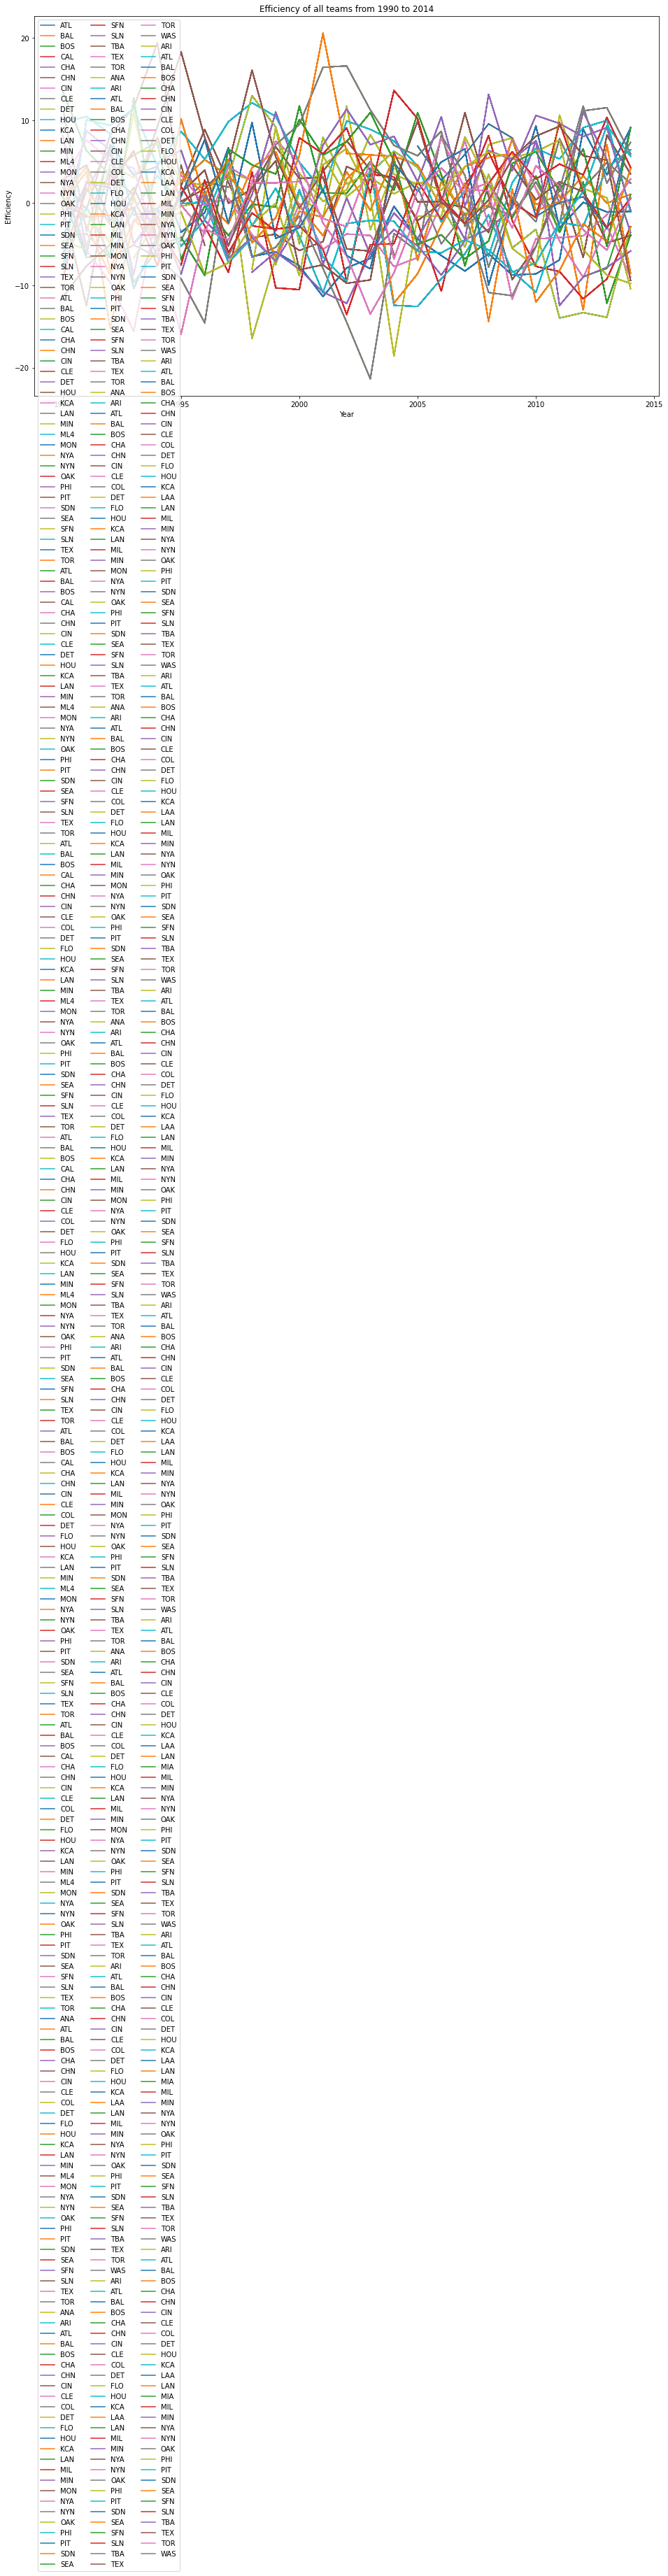

In [18]:
efficiency = df.pivot( 
    index = 'yearID',
    columns = 'teamID',
    values = 'efficiency'
)

plt.figure( figsize=(16,10) );
for col in df.teamID:
    plt.plot( efficiency[col], label = col );
    plt.legend( col );
plt.title( "Efficiency of all teams from 1990 to 2014" )
plt.xlabel( "Year" );
plt.ylabel( "Efficiency" );
plt.legend( loc='best', ncol=3 );

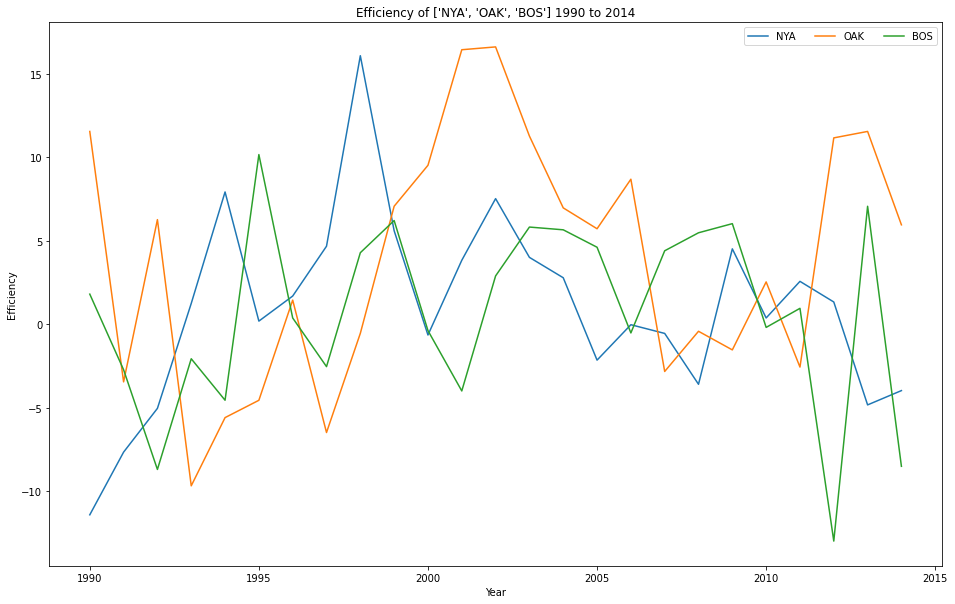

In [19]:
efficiency = df.pivot( index='yearID', columns='teamID', values='efficiency' )

teams = ['NYA', 'OAK', 'BOS']

plt.figure( figsize=(16,10) );
for col in teams:
    plt.plot( efficiency[col], label = col );
    plt.legend( col );

plt.title( "Efficiency of ['NYA', 'OAK', 'BOS'] 1990 to 2014" )
plt.xlabel( "Year" );
plt.ylabel( "Efficiency" );
plt.legend( loc='best', ncol=3 );

In [20]:
# Best 5 efficiency years for Oakland 
df.loc[df['teamID']=='OAK'].sort_values('efficiency', ascending=False).head(5)

,yearID,teamID,franchID,W,G,winning_percentage,total_payroll,periods,standardized_payroll,efficiency
488,2002,OAK,OAK,103,162,63.580247,40004167.0,"[2000, 2005)",-1.112298,16.622822
458,2001,OAK,OAK,102,162,62.962963,33810750.0,"[2000, 2005)",-1.276715,16.453590
817,2013,OAK,OAK,96,162,59.259259,60132500.0,"[2010, 2015)",-0.840019,11.559844
147,1990,OAK,OAK,103,162,63.580247,19887501.0,"[1990, 1995)",0.746360,11.557785
518,2003,OAK,OAK,96,162,59.259259,50260834.0,"[2000, 2005)",-0.738300,11.282651


In [21]:
# Best 5 efficiency years for NYA 
df.loc[ df['teamID'] == 'NYA'].sort_values('efficiency', ascending=False).head(5)

,yearID,teamID,franchID,W,G,winning_percentage,total_payroll,periods,standardized_payroll,efficiency
366,1998,NYA,NYY,114,162,70.370370,66806867.0,"[1995, 2000)",1.573223,16.094623
253,1994,NYA,NYY,70,113,61.946903,45731334.0,"[1990, 1995)",1.476691,7.934215
486,2002,NYA,NYY,103,161,63.975155,125928583.0,"[2000, 2005)",2.367523,7.534857
396,1999,NYA,NYY,98,162,60.493827,86734359.0,"[1995, 2000)",1.795931,5.611175
337,1997,NYA,NYY,96,162,59.259259,62241545.0,"[1995, 2000)",1.683010,4.684330


## Comments:
* Plots showing that paying all throughout years can be very efficient like in NYA case 
    but some cases like Oakland it's not.


## “How good was Oakland's efficiency during the Moneyball period?”

* Oakland had the highest spending efficiency between years 2000 and 2005.